##Overview
This notebook is used to prove the Airbnb data is usable and interesting.


##Results
There are 74 columns, most of which are not useful for predicting price. However, many of the key fields such as bathrooms, beds, bedrooms, ratings, amenities, and room type have low rates of nulls and correlate loosely with price. This data is deemed usable and informative for this Project's use case.

# Data Import
Install packages. Import data from Kaggle into Python.

## Install packages and import data from Google Drive

In [2]:
#Install necessary packages
import os #needed to check directory
import pandas as pd #import pandas library to convert data to dataframe for easy analysis
import numpy as np #import numpy library for EDA
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # more data visualization and statistics
import sklearn #machine learning
import plotly.express as px #plotting
from ast import literal_eval #used to convert string to list
from sklearn import preprocessing #for label encoding and normalizing
from sklearn.preprocessing import MinMaxScaler #to normalize data
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn import metrics #simple MAE, MSE, RMSE calculation packages
from scipy.stats import gaussian_kde #dispay density scatter chart
from sklearn.model_selection import train_test_split #model splitting into training and testing data
from sklearn.linear_model import LinearRegression #package for linear regression model
!pip install lazypredict #run data against many models
import nltk #natural language processing tool kit
nltk.download('punkt') #tokenize words in dataframe
nltk.download('stopwords') #identifying stopwords as part of nlp
from sklearn import metrics #use sklearn built-in calculations for scoring success metrics
from scipy.spatial.distance import cdist #calculates distance between many coordinates at once
from lazypredict import Supervised #laxypredict for supervised learning problem
from lazypredict.Supervised import LazyRegressor #laxypredict for regression problem
import lightgbm as ltb #LigthGBM Model for ML
#import data from google drivefrom sklearn.preprocessing import PolynomialFeatures #Polynomial fitting model
import plotly.graph_objects as go #allows 2 sets of data on one set of axes plotly

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Access data from google drive & reformat it for import

url = 'https://drive.google.com/file/d/1YU91bN5I9mIj75if3T12dVWbxNco95Wd/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2] #reformat

#define a dataframe called abnb0 containing all listing data. Specify the datatypes.
abnb0 = pd.read_csv(path, dtype={"listing_url": "string","scrape_id": "float","last_scraped": "string","name": "string",
                    "description": "string","neighborhood_overview": "string","picture_url": "string",
                    "host_id": "float","host_url": "string","host_name": "string","host_since": "string",
                    "host_location": "string","host_about": "string","host_response_time": "string",
                    "host_response_rate": "string","host_acceptance_rate": "string","host_is_superhost": "string",
                    "host_thumbnail_url": "string","host_picture_url": "string","host_neighbourhood": "string",
                    "host_listings_count": "float","host_total_listings_count": "float","host_verifications": "string",
                    "host_has_profile_pic": "string","host_identity_verified": "string","neighbourhood": "string",
                    "neighbourhood_cleansed": "string","neighbourhood_group_cleansed": "string","latitude": "float",
                    "longitude": "float","property_type": "string","room_type": "string","accommodates": "float",
                    "bathrooms": "float","bathrooms_text": "string","bedrooms": "float","beds": "float",
                    "amenities": "string","price": "string","minimum_nights": "float","maximum_nights": "float",
                    "minimum_minimum_nights": "float","maximum_minimum_nights": "float","minimum_maximum_nights": "float",
                    "maximum_maximum_nights": "float","minimum_nights_avg_ntm": "float","maximum_nights_avg_ntm": "float",
                    "calendar_updated": "string","has_availability": "string","availability_30": "int64",
                    "availability_60": "float","availability_90": "float","availability_365": "float",
                    "calendar_last_scraped": "string","number_of_reviews": "float","number_of_reviews_ltm": "float",
                    "number_of_reviews_l30d": "float","first_review": "string","last_review": "string",
                    "review_scores_rating": "float","review_scores_accuracy": "float",
                    "review_scores_cleanliness": "float","review_scores_checkin": "float",
                    "review_scores_communication": "float","review_scores_location": "float",
                    "review_scores_value": "float","license": "string","instant_bookable": "string",
                    "calculated_host_listings_count": "float","calculated_host_listings_count_entire_homes": "float",
                    "calculated_host_listings_count_private_rooms": "float",
                    "calculated_host_listings_count_shared_rooms": "float","reviews_per_month": "float"})


In [4]:
#Create a copy of the imported dataframe so that it can be reset as transformations occur during analysis
abnb=abnb0.copy()

# Preliminary Data Exploration
Explore the data to understand what is available. Identify data anomalies and data quality issues that need to be addressed.

## Map

In [5]:
#Let's map the longitude and latitude data and color by borough (neighborhood group)
fig = px.scatter(abnb, x="longitude", y="latitude", color='neighbourhood_group_cleansed',width=1000, height=800)
fig.update_traces(marker_size=3)
fig.update_layout(legend= {'itemsizing': 'constant'})
fig.update_layout(title={'text': "Map of Airbnbs in NYC by Borough",'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Longitude", yaxis_title="Latitude")
fig.update_layout(legend_title_text='Borough')
fig.update_layout(legend=dict(x=0.02, y=.98))
fig.show()

In [6]:
# display record counts per each borough
abnb.groupby('neighbourhood_group_cleansed')['id'].agg(['count']).sort_values(['count'],ascending=False)

,count
neighbourhood_group_cleansed,
Manhattan,15855
Brooklyn,13954
Queens,5824
Bronx,1376
Staten Island,401


## Statistics of each column

In [7]:
#dimensions of the listing dataset
abnb.shape

(37410, 74)

In [8]:
# analyze nulls for the listing dataset
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37410 non-null  float64
 1   listing_url                                   37410 non-null  string 
 2   scrape_id                                     37410 non-null  float64
 3   last_scraped                                  37410 non-null  string 
 4   name                                          37396 non-null  string 
 5   description                                   36523 non-null  string 
 6   neighborhood_overview                         22430 non-null  string 
 7   picture_url                                   37410 non-null  string 
 8   host_id                                       37410 non-null  float64
 9   host_url                                      37410 non-null 

In [9]:
#create a dataframe that contains columns and the null counts per column

cols = abnb.columns
vals = abnb.isna().sum()
df = pd.DataFrame({'column' : cols, 'count' : vals})
df.sort_values('count',inplace=True)
df.reset_index(drop=True,inplace=True)

In [10]:
#remove the rows that have 0 nulls
df = df[df['count'] >0]

In [11]:
df = df.drop(df[df['column'] == 'name'].index)
df = df.drop(df[df['column'] == 'maximum_minimum_nights'].index)
df = df.drop(df[df['column'] == 'minimum_minimum_nights'].index)
df = df.drop(df[df['column'] == 'minimum_maximum_nights'].index)
df = df.drop(df[df['column'] == 'maximum_maximum_nights'].index)
df = df.drop(df[df['column'] == 'minimum_nights_avg_ntm'].index)
df = df.drop(df[df['column'] == 'maximum_nights_avg_ntm'].index)
df = df.drop(df[df['column'] == 'host_thumbnail_url'].index)
df = df.drop(df[df['column'] == 'host_picture_url'].index)
df = df.drop(df[df['column'] == 'host_has_profile_pic'].index)
df = df.drop(df[df['column'] == 'host_listings_count'].index)
df = df.drop(df[df['column'] == 'host_name'].index)
df = df.drop(df[df['column'] == 'bathrooms_text'].index)
df = df.drop(df[df['column'] == 'host_is_superhost'].index)
df = df.drop(df[df['column'] == 'host_identity_verified'].index)
df = df.drop(df[df['column'] == 'host_since'].index)
df = df.drop(df[df['column'] == 'host_total_listings_count'].index)
df = df.drop(df[df['column'] == 'host_location'].index)

<Axes: title={'center': 'Null Counts in Airbnb Dataset'}, ylabel='column'>

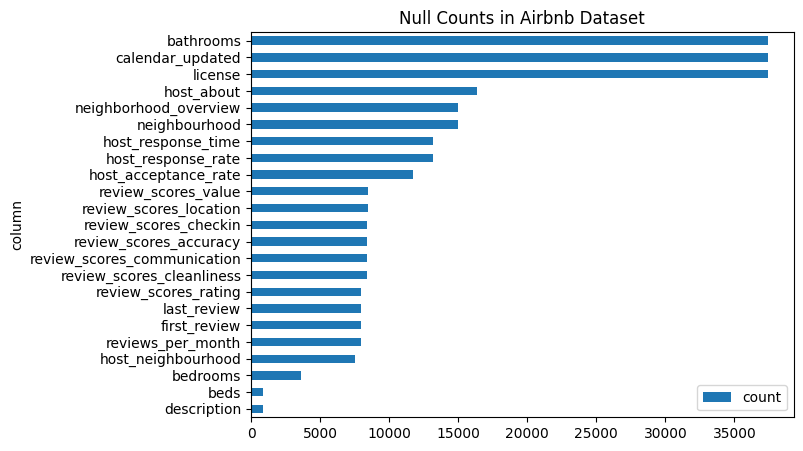

In [12]:
#plot on a bar chart for a visual
df.plot('column', 'count', kind='barh',figsize=(7,5), title='Null Counts in Airbnb Dataset')

In [13]:
#statistics of numerical fields
pd.set_option('display.max_columns', None)
abnb.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,37410.00,37410.00,37410.00,37344.00,37344.00,37410.00,37410.00,37410.00,0.00,33756.00,36509.00,37410.00,37410.00,37395.00,37395.00,37395.00,37395.00,37395.00,37395.00,37410.00,37410.00,37410.00,37410.00,37410.00,37410.00,37410.00,29461.00,28982.00,28992.00,28978.00,28987.00,28975.00,28975.00,37410.00,37410.00,37410.00,37410.00,29461.00
mean,61003854209766016.00,20220600000000.00,123714044.80,63.81,63.81,40.73,-73.95,2.90,NaN,1.35,1.63,19.76,59091.23,20.41,27.53,1552374.72,3390047.94,26.99,2318962.29,4.70,12.79,23.52,119.70,26.35,7.25,0.76,4.62,4.75,4.63,4.82,4.81,4.75,4.65,15.11,9.40,5.60,0.05,1.17
std,180604014548052032.00,0.00,138239749.95,400.33,400.33,0.06,0.06,1.96,NaN,0.73,1.15,32.77,11103843.52,40.99,79.35,57683946.66,85233887.80,77.47,65175206.97,8.22,18.63,29.52,132.76,55.06,18.32,1.77,0.76,0.47,0.55,0.42,0.44,0.41,0.50,50.72,45.42,23.81,0.49,1.85
min,2595.00,20220600000000.00,2438.00,0.00,0.00,40.50,-74.27,0.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.01
25%,14700530.50,20220600000000.00,12939655.50,1.00,1.00,40.69,-73.98,2.00,NaN,1.00,1.00,2.00,60.00,2.00,3.00,360.00,365.00,2.00,365.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,4.59,4.71,4.50,4.80,4.80,4.67,4.56,1.00,0.00,0.00,0.00,0.13
50%,34843406.00,20220600000000.00,53725579.00,1.00,1.00,40.72,-73.95,2.00,NaN,1.00,1.00,30.00,365.00,30.00,30.00,1125.00,1125.00,30.00,1125.00,0.00,1.00,7.00,60.00,5.00,0.00,0.00,4.83,4.90,4.80,4.95,4.96,4.86,4.78,1.00,1.00,0.00,0.00,0.49
75%,50184000.50,20220600000000.00,209373797.00,3.00,3.00,40.76,-73.93,4.00,NaN,1.00,2.00,30.00,1125.00,30.00,30.00,1125.00,1125.00,30.00,1125.00,6.00,23.00,44.00,254.00,25.00,6.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,4.97,3.00,1.00,1.00,0.00,1.64
max,641241000000000000.00,20220600000000.00,462393661.00,3404.00,3404.00,40.93,-73.69,16.00,NaN,15.00,42.00,1250.00,2147483647.00,1250.00,1250.00,2147483647.00,2147483647.00,1250.00,2147483647.00,30.00,60.00,90.00,365.00,1419.00,1010.00,97.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,391.00,391.00,190.00,11.00,81.26


### Comment

Observations:
1. Price, acceptance rate, response rate, and date columns are not in the right data format. These could not be converted on import because they contained non-integer characters($, %) or they are datetime. (See Data Cleansing section for resolution)
2. Important fields like price, longitude, latitude, number of reviews, property type, room type, accommodates and amenities all have data for every listing. This is good.
3. Missing data from average review score, beds, bedrooms, and bathroom text needs to be cleaned up.
4. License, calendar updated, and bathrooms are largely unused and may be deleted.
5. From the above, we can see that "bathrooms" is an unused field. However, there is a similar field called "bathrooms_text" which may be more useful.
6. First review, last review and host since have many blanks

## Plots with price - are there any immediate correlations?

In [14]:
price_box = abnb.copy()
price_box['price'] = price_box['price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float)
fig = px.box(price_box, x="price",title="Boxplot of Price", width=1600, height=400)
fig.update_layout(title_x=0.5,title_y=0.8)

fig.show()

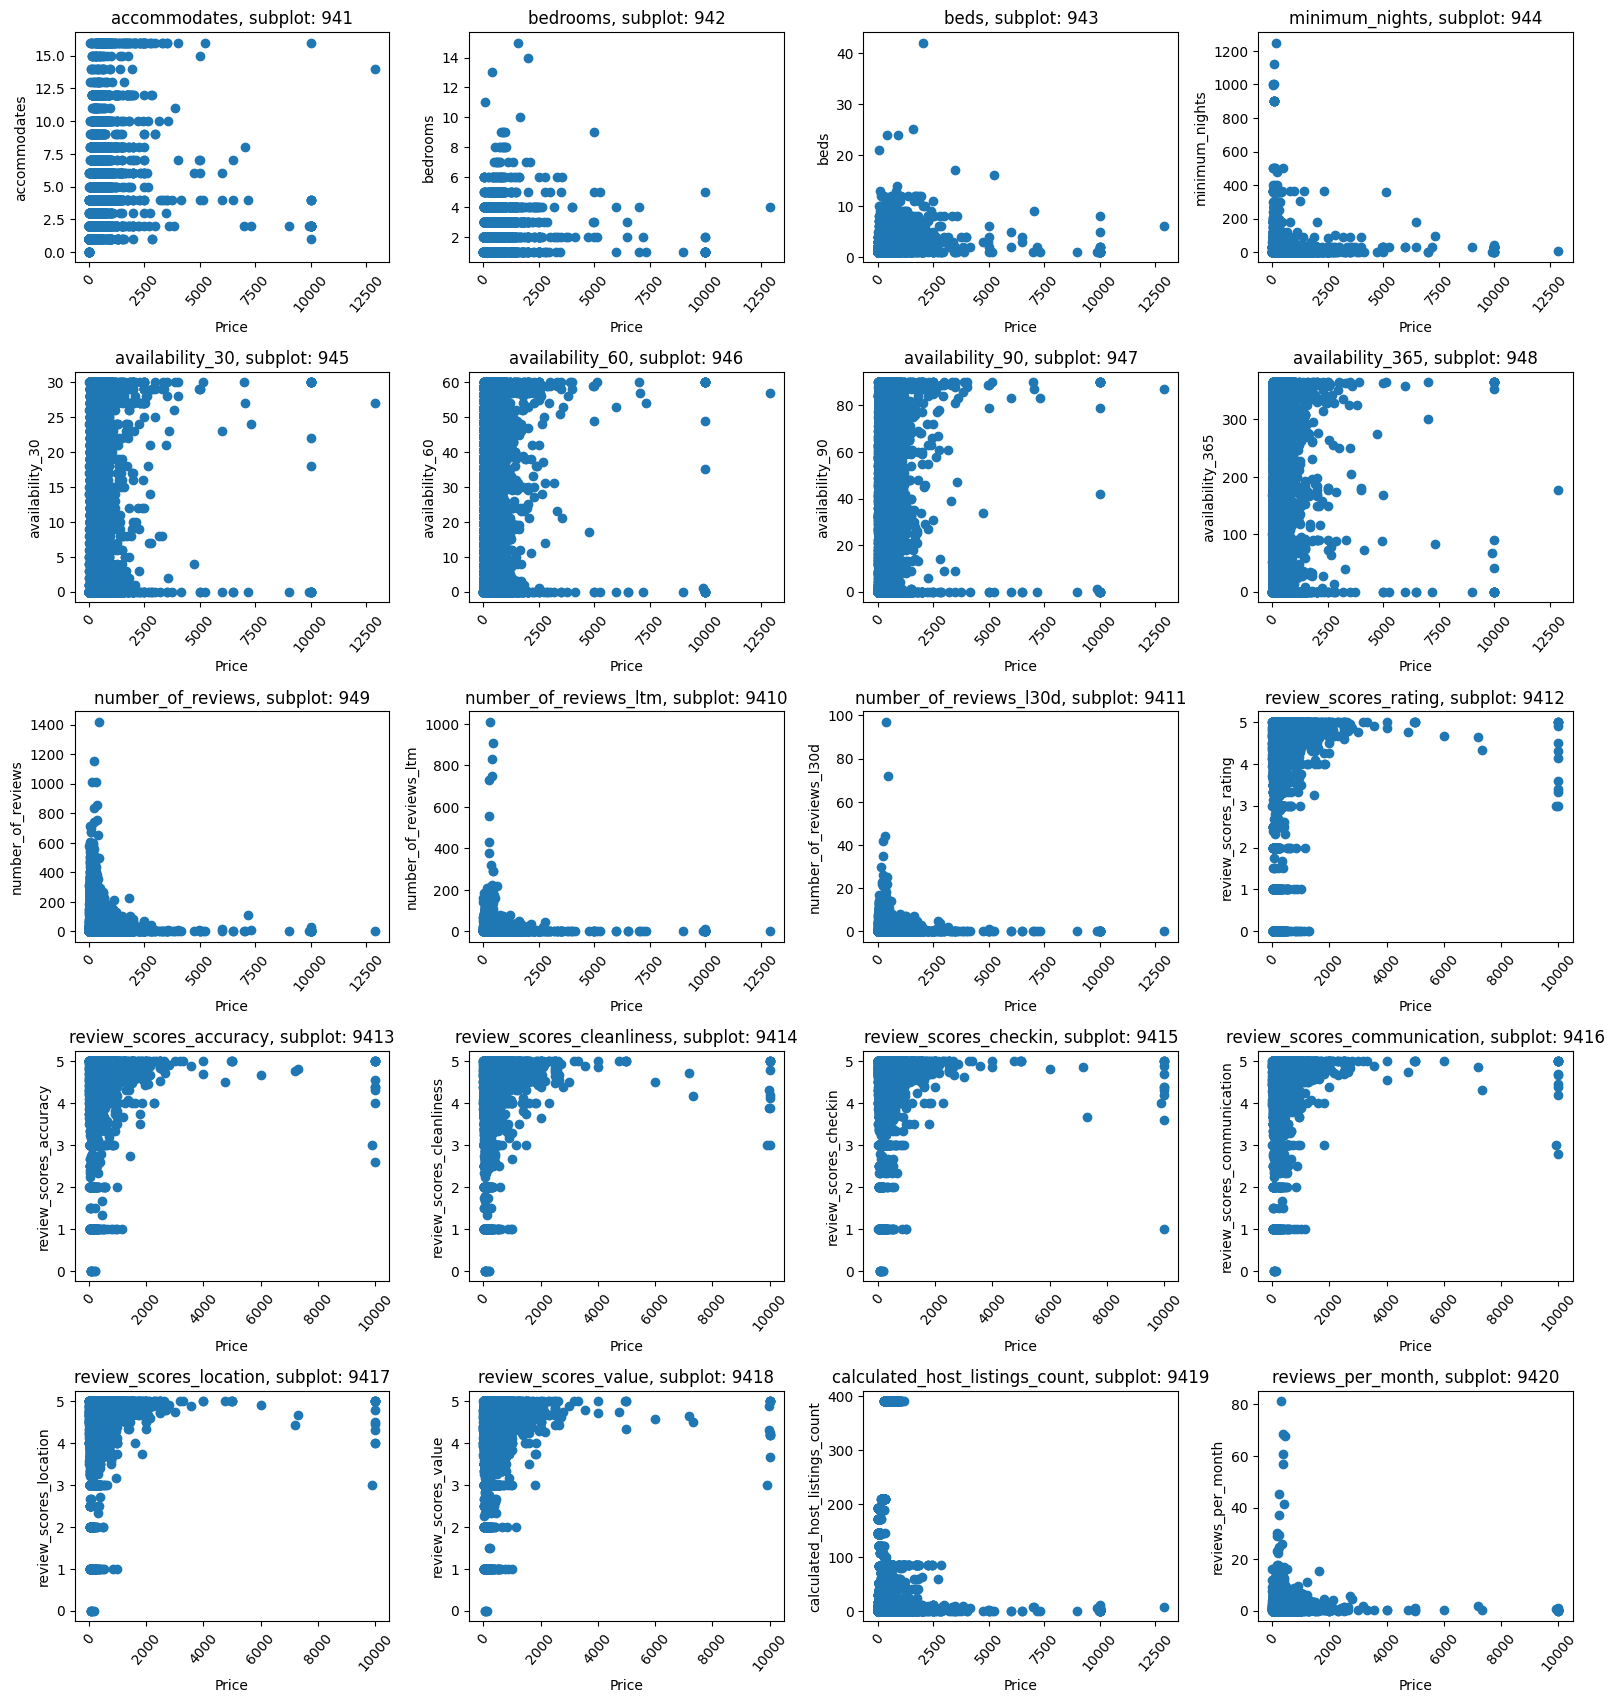

In [15]:
#Create plots for price against all other numerical fields to see if there are any obvious correlations
abnb_test1 = abnb.copy() #create new dataframe for scatter plot that reformats price
abnb_test1['price'] = abnb_test1['price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float) #convert price field to float without dollar sign

#remove fields that are not relevant to price
abnb_test1.drop(columns=['name', 'description','neighborhood_overview','host_id','host_name','host_location','host_about',
            'host_response_time','host_listings_count', 'host_since', 'host_response_rate','host_acceptance_rate',
            'host_has_profile_pic','host_identity_verified','maximum_nights','has_availability','instant_bookable',
            'listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_thumbnail_url','license',
            'host_picture_url', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'calendar_updated',
            'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
            'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped', 'bathrooms',
            'calculated_host_listings_count_entire_homes','first_review','last_review', 'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms','host_total_listings_count'], inplace=True)


y = abnb_test1['price'] #all charts will be against price column as y axis
col=list(abnb_test1.select_dtypes(include=[float, int]).columns)
col.remove('price') #do not plot price vs price
col.remove('id') #do not plot id vs price - meaningless
col.remove('longitude') #do not plot longitude vs price - meaningless
col.remove('latitude') #do not plot latitude vs price - meaningless

a = 9  # rows
b = 4  # columns
c = 1  # initial count

fig = plt.figure(figsize=(16,30))

#Create subplots for every numerical field against price
for i in col:
    plt.subplot(a, b, c)
    plt.scatter(y, abnb_test1[i])
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.ylabel(i)
    plt.xlabel("Price")
    plt.xticks(rotation = 50)
    c = c + 1
fig.tight_layout() #adjust spacing of labels to readable
plt.show()

## Density chart comparing an Airbnb's rating versus price

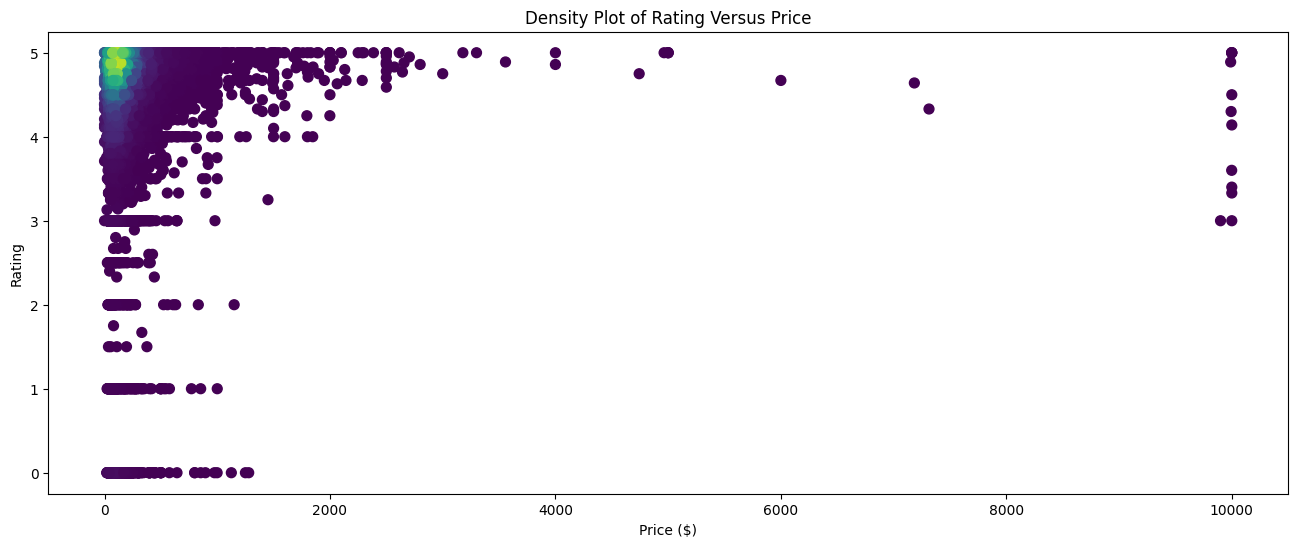

In [16]:
#Use Gaussian KDE plot to highlight densities in the data between rating and price
abnb_test2 = abnb[['price', 'review_scores_rating']].copy() #create new dataframe with only 2 columns intended for scatter
abnb_test2['price'] = abnb_test2['price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float) #convert price field to float without dollar sign
abnb_test2.dropna(axis=0, inplace=True) #code will not run on null values. this will remove them

xy = np.vstack([abnb_test2.price, abnb_test2.review_scores_rating]) #store data row-wise
z = gaussian_kde(xy)(xy) #create color pallete based on density

fig, ax = plt.subplots()
ax.scatter(abnb_test2.price, abnb_test2.review_scores_rating, c=z, s=50) #scatter plot using z color pallette and large marker size (s)
ax.set_title("Density Plot of Rating Versus Price")
ax.set_xlabel("Price ($)")
ax.set_ylabel("Rating")
fig.set_size_inches(16, 6)
plt.show()

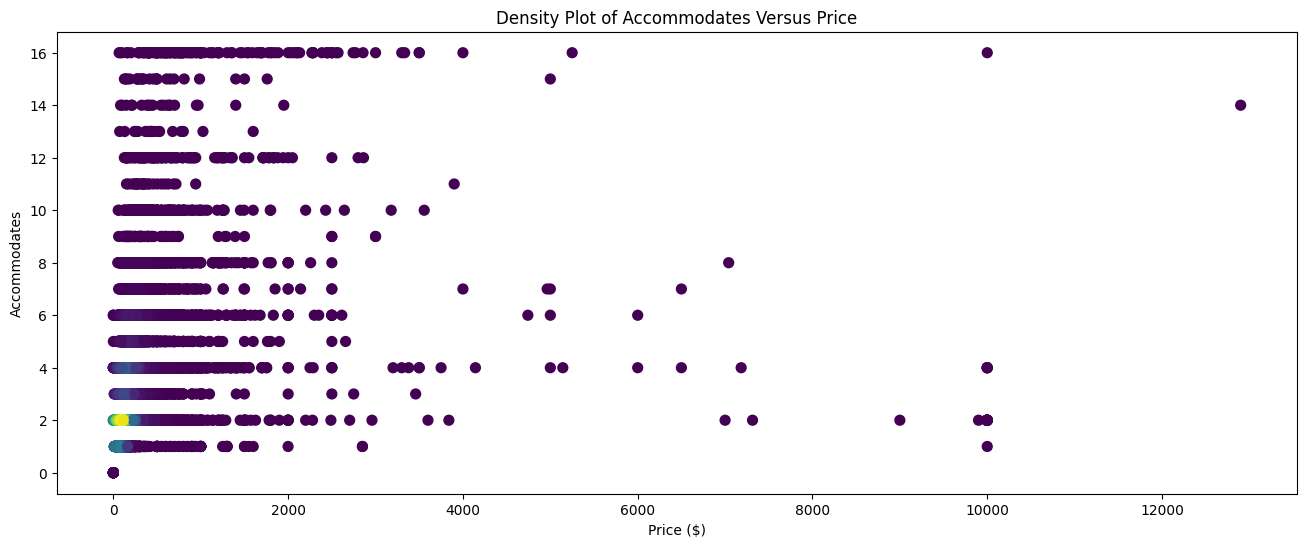

In [17]:
#Use Gaussian KDE plot to highlight densities in the data between rating and price
abnb_test3 = abnb[['price', 'accommodates']].copy() #create new dataframe with only 2 columns intended for scatter
abnb_test3['price'] = abnb_test3['price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float) #convert price field to float without dollar sign
abnb_test3.dropna(axis=0, inplace=True) #code will not run on null values. this will remove them

xy = np.vstack([abnb_test3.price, abnb_test3.accommodates]) #store data row-wise
z = gaussian_kde(xy)(xy) #create color pallete based on density

fig, ax = plt.subplots()
ax.scatter(abnb_test3.price, abnb_test3.accommodates, c=z, s=50) #scatter plot using z color pallette and large marker size (s)
ax.set_title("Density Plot of Accommodates Versus Price")
ax.set_xlabel("Price ($)")
ax.set_ylabel("Accommodates")
fig.set_size_inches(16, 6)
plt.show()

In [18]:
roomtypeBar=abnb.groupby('room_type').count().reset_index()

fig = px.bar(roomtypeBar, x='id', y='room_type',barmode='stack',text_auto='.2s', width=700, height=500, title="Room Type Counts", orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_title="Count", yaxis_title="Room Type",title_x=0.5,title_y=0.85)

fig.show()

array([[<Axes: title={'center': 'review_scores_rating'}>]], dtype=object)

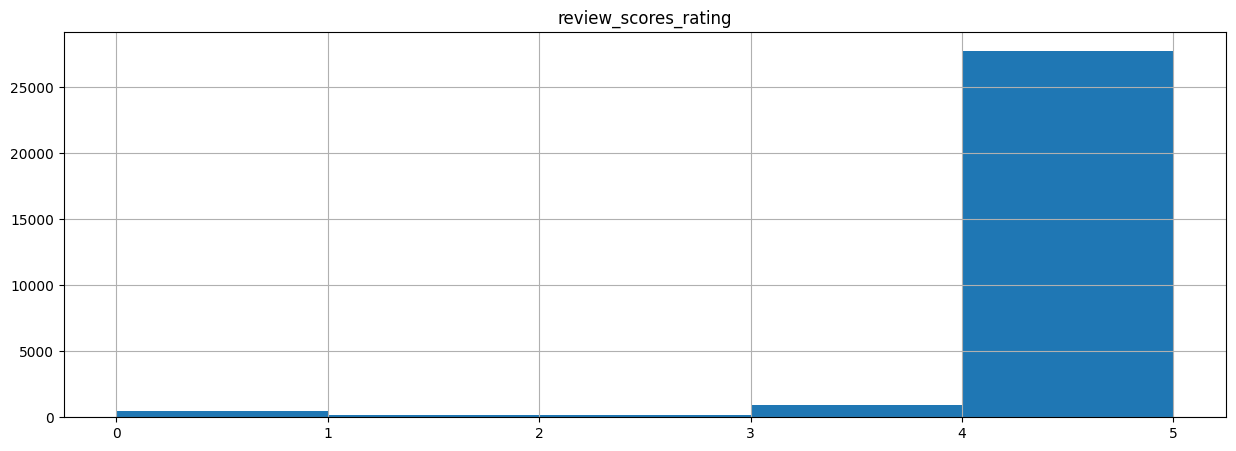

In [19]:
#What is the spread of average rating of an NYC Airbnb?
abnb.hist(column='review_scores_rating', bins = 5,
        figsize=(15, 5))

array([[<Axes: title={'center': 'accommodates'}>]], dtype=object)

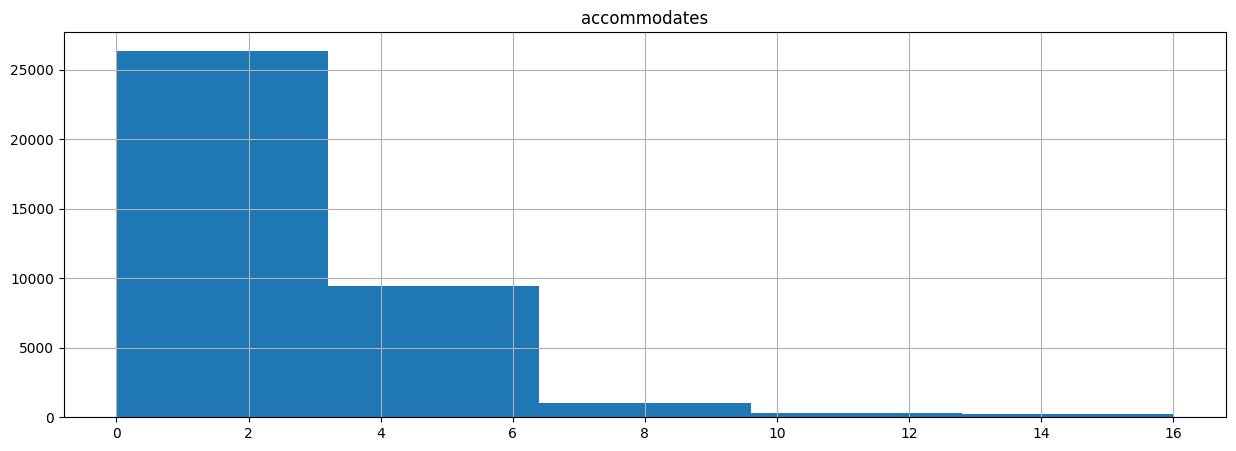

In [20]:
#What is the spread of how many people the bnb can accommodate?
abnb.hist(column='accommodates', bins = 5,
        figsize=(15, 5))

In [21]:
abnb.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595.00,https://www.airbnb.com/rooms/2595,20220600000000.00,6/4/2022,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845.00,https://www.airbnb.com/users/show/2845,Jennifer,9/9/2008,"New York, New York, United States",A New Yorker since (Phone number hidden by Air...,a few days or more,39%,19%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.00,6.00,"['email', 'phone', 'work_email']",t,t,"New York, United States",Midtown,Manhattan,40.75,-73.99,Entire rental unit,Entire home/apt,1.00,NaN,1 bath,NaN,1.00,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",$225.00,30.00,1125.00,30.00,30.00,1125.00,1125.00,30.00,1125.00,<NA>,t,0,3.00,33.00,308.00,6/4/2022,48.00,0.00,0.00,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,<NA>,f,3.00,3.00,0.00,0.00,0.31
1,5121.00,https://www.airbnb.com/rooms/5121,20220600000000.00,6/4/2022,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,<NA>,https://a0.muscache.com/pictures/2090980c-b68e...,7356.00,https://www.airbnb.com/users/show/7356,Garon,2/3/2009,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.00,1.00,"['email', 'phone']",t,t,<NA>,Bedford-Stuyvesant,Brooklyn,40.69,-73.96,Private room in rental unit,Private room,2.00,NaN,<NA>,1.00,1.00,"[""Heating"", ""Long term stays allowed"", ""Kitche...",$60.00,30.00,730.00,30.00,30.00,730.00,730.00,30.00,730.00,<NA>,t,30,60.00,90.00,365.00,6/4/2022,50.00,0.00,0.00,5/28/2009,12/2/2019,4.52,4.22,4.09,4.91,4.91,4.47,4.52,<NA>,f,2.00,0.00,2.00,0.00,0.32
2,5136.00,https://www.airbnb.com/rooms/5136,20220600000000.00,6/4/2022,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,<NA>,https://a0.muscache.com/pictures/miso/Hosting-...,7378.00,https://www.airbnb.com/users/show/7378,Rebecca,2/3/2009,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",within an hour,100%,50%,f,https://a0.muscache.com/im/users/7378/profile_...,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1.00,1.00,"['email', 'phone']",t,t,<NA>,Sunset Park,Brooklyn,40.66,-73.99,Entire rental unit,Entire home/apt,4.00,NaN,1.5 baths,2.00,2.00,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",$275.00,21.00,1125.00,21.00,21.00,1125.00,1125.00,21.00,1125.00,<NA>,t,3,3.00,4.00,250.00,6/4/2022,2.00,1.00,0.00,1/2/20

Based on this analysis, this dataset is usable and interesting.